# Statistics - Linear Regression

---

## What is Linear Regression?

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable (response) and one or more independent variables (features). It assumes a linear relationship of the form $y = X\beta + \epsilon$, where $\beta$ represents the model parameters (coefficients) to be estimated. Linear regression is widely used for prediction, inference, and understanding the strength and direction of linear relationships between variables, which makes it highly interpretable when compared to many other complex models (e.g., neural networks, decision trees). This model serves as the foundation for many more advanced statistical and machine learning techniques.


## Setup

The linear regression model is:

$$
y = X\beta + \epsilon
$$

where

$$
X \in \mathbb{R}^{n \times p}, 
\qquad
\beta \in \mathbb{R}^{p},
\qquad
y \in \mathbb{R}^{n},
\qquad
\epsilon \in \mathbb{R}^{n}
$$

**Interpretation of each term:**

- **Design matrix \(X\)**: contains the input features for all observations.  
  Each row corresponds to one data point $x_i$ and each column corresponds to one feature:
  $$
  X =
  \begin{bmatrix}
  x_1^\top \\[6pt]
  x_2^\top \\[6pt]
  \vdots \\[6pt]
  x_n^\top
  \end{bmatrix},
  \qquad
  x_i \in \mathbb{R}^{p}
  $$
  Here, $x_i$ is the feature vector for observation \(i\).  
  If an intercept is included, the first entry of each $x_i$ is typically \(1\) (equivalently, the first column of \(X\) is all ones).

- **Response vector \(y\)**: contains the observed target values:
  $$
  y =
  \begin{bmatrix}
  y_1 \\[6pt]
  y_2 \\[6pt]
  \vdots \\[6pt]
  y_n
  \end{bmatrix}
  $$

- **Coefficient vector $\beta$**: contains the unknown parameters we estimate from data:
  $$
  \beta =
  \begin{bmatrix}
  \beta_1 \\[6pt]
  \beta_2 \\[6pt]
  \vdots \\[6pt]
  \beta_p
  \end{bmatrix}
  $$
  If the first column of \(X\) is all ones (intercept included), then:
  - $\beta_1$ is the **intercept**
  - $\beta_2, \ldots, \beta_p$ are the **slopes** for each feature.


For a single observation $i$, the model is:

$$
y_i = x_i^\top \beta + \epsilon_i
$$

and if we write $x_i = (1, x_{i2}, \ldots, x_{ip})^\top$, then:

$$
y_i = \beta_1 + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + \epsilon_i.
$$

**Connection to $y = mx + c$ (simple linear regression):**  
If there is only one feature $x$ (plus an intercept), then $p=2$ and

$$
y_i = \beta_1 + \beta_2 x_i + \epsilon_i,
$$

so $\beta_2$ corresponds to the slope $m$ and $\beta_1$ corresponds to the intercept $c$.

**Error terms**

In linear regression, we assume $\epsilon$ captures the part of $y$ not explained by the linear predictor $X\beta$ (e.g., measurement noise, omitted factors, random variation). A key assumption is that the errors is that 

$$
\mathbb{E}[\epsilon \mid X] = 0,
$$

so on average the model does not systematically over- or under-predict.

In this notebook we will assume each error terms are independent and identically distributed Gaussian errors (the most common setup for plain linear regression):

$$
\epsilon_i \sim \mathcal{N}(0, \sigma^2 I_n),
$$

meaning the noise has mean $0$, variance $\sigma^2$, and is uncorrelated across observations.



In [13]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# uv pip install scikit-learn
from sklearn.linear_model import LinearRegression



In [14]:
log = logging.getLogger(__name__)
log.setLevel(logging.INFO)
if not log.hasHandlers():
    handler = logging.StreamHandler()
    handler.setFormatter(logging.Formatter("[%(asctime)s] [%(levelname)s] %(message)s"))
    log.addHandler(handler)

In [15]:
np.random.seed(42)

## Implementation

Below we demonstrate plain linear regression by generating two predictors and adding Gaussian noise, then fitting a linear model with two predictors.

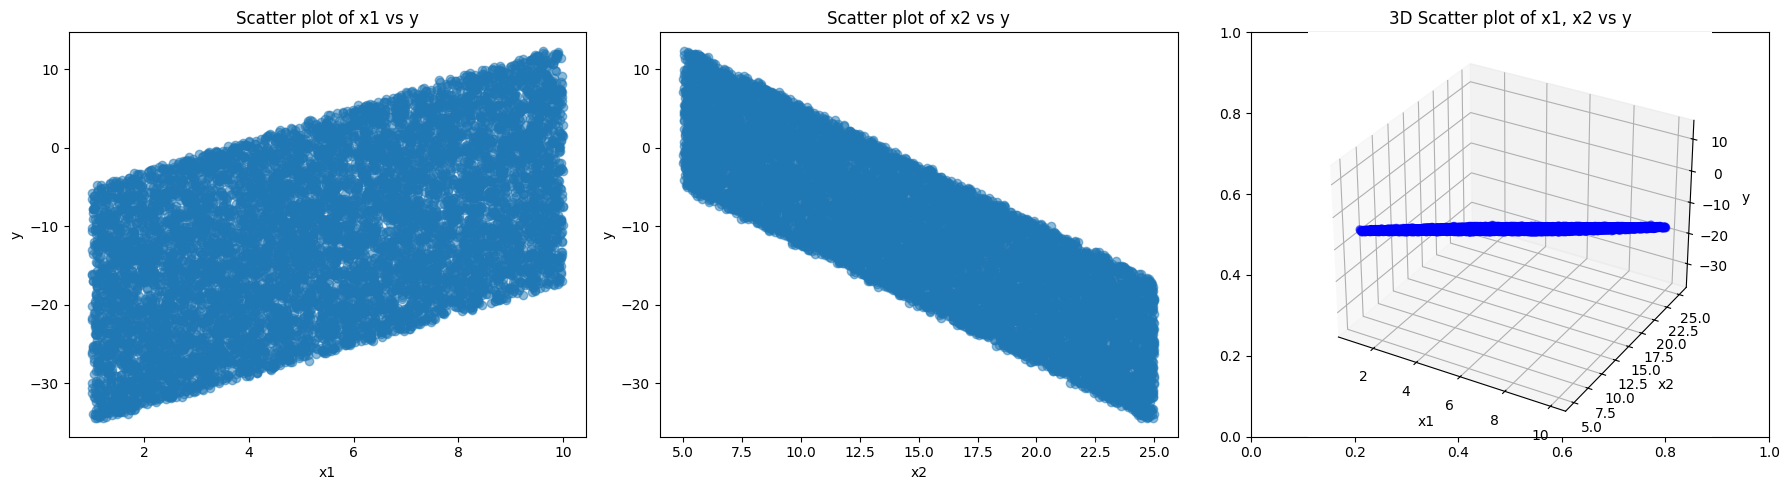

In [16]:
n_samples = int(1e4)

# Simple features: x1, x2
x0 = np.ones(n_samples)
x1 = np.random.uniform(1, 10, n_samples)
x2 = np.random.uniform(5, 25, n_samples)

# TRUE model
true_beta = np.array([2.0, -1.5])
X = np.c_[x0, x1, x2]

# Generate target with some noise
y = X @ np.r_[0.5, true_beta] + 0.2 * np.random.randn(n_samples)
# Plot the data
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(x1, y, alpha=0.5)
axs[0].set_xlabel("x1")
axs[0].set_ylabel("y")
axs[0].set_title("Scatter plot of x1 vs y")
axs[1].scatter(x2, y, alpha=0.5)

axs[1].set_xlabel("x2")
axs[1].set_ylabel("y")
axs[1].set_title("Scatter plot of x2 vs y")

axs[2] = fig.add_subplot(1, 3, 3, projection="3d")
axs[2].scatter(x1, x2, y, c="blue", alpha=0.5, s=30)
axs[2].set_xlabel("x1")
axs[2].set_ylabel("x2")
axs[2].set_zlabel("y")
axs[2].set_title("3D Scatter plot of x1, x2 vs y")

plt.tight_layout()
plt.show()

In [17]:
# Fit using Normal Equation
beta = np.linalg.solve(X.T @ X, X.T @ y)

# Predictions
y_pred = X @ beta

# Compare with sklearn
X_raw = np.c_[x1, x2]
model = LinearRegression(fit_intercept=True)
model.fit(X_raw, y)
y_sklearn = model.predict(X_raw)

log.info(f"Manual Estimated coefficients: {np.round(beta, 3)}")
log.info(
    f"Sklearn Estimated coefficients: {np.round(np.r_[model.intercept_, model.coef_], 3)}"
)
log.info(f"True coefficients: {np.round(np.r_[0.5, true_beta], 3)}")

[2026-02-04 22:05:10,830] [INFO] Manual Estimated coefficients: [ 0.511  1.999 -1.5  ]
[2026-02-04 22:05:10,831] [INFO] Sklearn Estimated coefficients: [ 0.511  1.999 -1.5  ]
[2026-02-04 22:05:10,831] [INFO] True coefficients: [ 0.5  2.  -1.5]


## Model Results Interpretation

The estimated coefficients are **[ 0.511  1.999 -1.5 ]**, which closely match the true coefficients **[ 0.5  2.  -1.5 ]**, demonstrating that both the manual Normal Equation approach and scikit-learn's LinearRegression produce virtually identical results.

**Coefficient Interpretations:**

- **Intercept (β₀ = 0.511)**: When both x₁ and x₂ are zero, the predicted value of y is approximately 0.511. This represents the baseline level of y.

- **x₁ coefficient (β₁ = 1.999)**: Holding x₂ fixed, a 1-unit increase in x₁ increases y by approximately 2.0 units on average.

- **x₂ coefficient (β₂ = -1.500)**: Holding x₁ fixed, a 1-unit increase in x₂ decreases y by approximately 1.5 units on average.

The excellent agreement between estimated and true coefficients validates that the linear regression model has successfully recovered the underlying data-generating process despite the presence of Gaussian noise.

### Metrics for evaluating linear regression

### RMSE

$$
\mathrm{RMSE}=\sqrt{\frac{1}{n}\sum_{i=1}^n\left(y_i-\hat y_i\right)^2}
$$

RMSE (Root Mean Squared Error) measures the typical size of the prediction error in the same units as $y$. Lower RMSE means predictions are closer to the true values.

### $R^2$

$$
R^2 = 1-\frac{\sum_{i=1}^n\left(y_i-\hat y_i\right)^2}{\sum_{i=1}^n\left(y_i-\bar y\right)^2}
$$

$R^2$ (coefficient of determination) is the fraction of variance in $y$ explained by the model, relative to predicting the mean $\bar y$. $R^2=1$ is perfect fit, $R^2=0$ is no better than the mean, and it can be negative if the model is worse than that baseline (constant mean model).


In [18]:
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
r_sq = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

log.info(f"RMSE on training data: {rmse:.4f}")
log.info(f"R-squared on training data: {r_sq:.4f}")

[2026-02-04 22:05:10,837] [INFO] RMSE on training data: 0.1978
[2026-02-04 22:05:10,838] [INFO] R-squared on training data: 0.9996


# Results Summary

The model fits the data extremely well: with an R² of 0.9996, it explains 99.96% of the variance in the response variable, and the RMSE of 0.1978 indicates predictions are typically off by about 0.20 units of y on average.

## Estimating parameters of linear regression

### Ordinary Least Squares

Ordinary Least Squares (OLS) is a method that estimates linear regression parameters by minimizing the sum of squared residuals between observed and predicted values.

Equivalently: find coefficients $\hat{\beta}$ that minimize sum of squared errors $(\text{SSE})$:

$$
\begin{align*}
\hat{\beta} &= \ell(\beta) \\
&= \arg\min_{\beta} \|y - X\beta\|^2 \\
&= \arg\min_{\beta} \sum_{i=1}^n (y_i - x_i^\top \beta)^2 \\
&= \arg\min_{\beta} \, (y - X\beta)^\top (y - X\beta) \\
&= \arg\min_{\beta} \, y^\top y - 2\beta^\top X^\top y + \beta^\top X^\top X \beta \\
\end{align*}
$$

Partially differentiate with respect to $\beta$ and set to 0:
$$
\begin{align*}
0 &= \frac{\partial \ell}{\partial \beta} \\
0 &= -2X^\top y + 2X^\top X \beta \\
0 &= 2X^\top (X\beta - y) \\
X^\top X \beta &= X^\top y \\
\hat{\beta} &:= (X^\top X)^{-1} X^\top y
\end{align*}
$$


### Maximum Likelihood Estimation 

Key assumption - assume Gaussian errors. The model is given by:

$$y = X\beta + \epsilon , \quad \epsilon \sim \mathcal{N}(\mathbf{0}, \sigma^2 I_n)$$

The likelihood and log-likelihood is given by:
$$
\begin{align*}
L(y \mid \beta, \sigma^2) &= (2\pi \sigma^2)^{-\frac{n}{2}} \exp\left( -\frac{1}{2\sigma^2} (y - X\beta)^\top (y - X\beta) \right) \\
\ell(\beta, \sigma^2) &= -\frac{n}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} (y - X\beta)^\top (y - X\beta)
\end{align*}
$$

Derivation of $\hat{\beta}$ remains the same:

$$
\begin{align*}
\frac{\partial \ell}{\partial \beta} &= \frac{1}{\sigma^2} (X^\top y - X^\top X \beta) = 0 \\
X^\top X \beta &= X^\top y \\
\hat{\beta} &:= (X^\top X)^{-1} X^\top y
\end{align*}
$$

We also have an estimate of $\hat{\sigma}$:

$$
\begin{align*}
\frac{\partial \ell}{\partial \sigma^2} &= -\frac{n}{2\sigma^2} + \frac{(y - X\hat{\beta})^\top (y - X\hat{\beta})}{2(\sigma^2)^2} = 0 \\
\hat{\sigma}^2 &= \frac{(y - X\hat{\beta})^\top (y - X\hat{\beta})}{n} \\
\hat{\sigma}^2 &:= \frac{1}{n} (y - X\hat{\beta})^\top (y - X\hat{\beta})
\end{align*}
$$

While OLS and MLE give the same $\hat{\beta}$ under Gaussian errors, note if we assume a different error distribution (e.g. Laplace errors), the MLE objective changes (e.g. to minimising absolute deviations), and the resulting estimator for $\beta$ generally differs from the OLS solution.



## Assumptions

Classic linear regression relies on some key assumptions about the data to work reliably, below are the assumptions alongside with diagnostic graphs to check if the model violates the assumptions. In real-world datasets, these conditions are rarely perfect, so these graphs are used to judge if any assumptions are violated that affects the validity of linear regression.

### 1. Linearity
$$\mathbb{E}[y \mid X] = X\beta$$

The model assumes the conditional mean of the response is a linear combination of the predictors. A common diagnostic is the **residuals vs fitted** plot: if the linear form is adequate, residuals should be randomly scattered around zero with no clear structure (e.g., no curvature or trend).


In [19]:
# residuals
resid = y - y_pred

n = len(y)
p = X.shape[1]  # includes intercept column if you added one

def zscore(a):
    a = np.asarray(a).ravel()
    return (a - a.mean()) / (a.std(ddof=1) + 1e-12)

# standardized residuals (simple)
std_resid = zscore(resid)

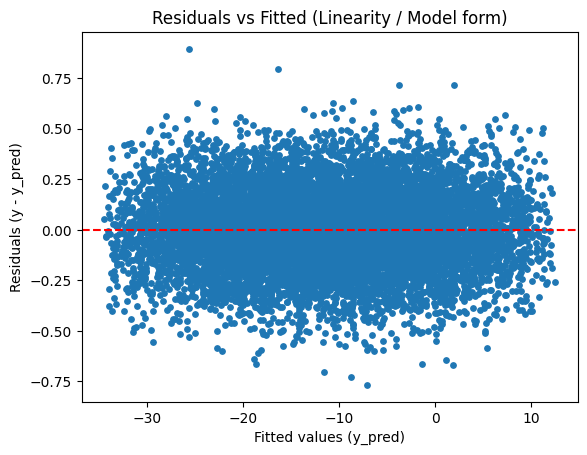

In [20]:
# Residuals vs Fitted plot
plt.figure()
plt.scatter(y_pred, resid, s=15)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values (y_pred)")
plt.ylabel("Residuals (y - y_pred)")
plt.title("Residuals vs Fitted (Linearity / Model form)")
plt.show()

### 2. Independence
$$\mathrm{Cov}(\epsilon_i, \epsilon_j)=0 \quad \text{for } i \neq j$$

This assumption says the error terms are not correlated across observations. It is often violated in **time series** (autocorrelation) or **clustered data** (within-group correlation). A simple diagnostic is a **residuals vs observation index** plot: if errors are independent, residuals should look like random noise with no obvious trends, cycles, or long runs of positive/negative values.


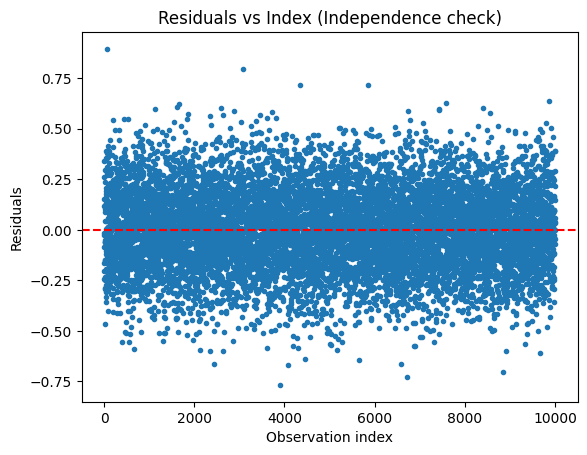

In [21]:
# Residuals vs Index plot
plt.figure()
plt.plot(resid, marker="o", linestyle="None", markersize=3)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Observation index")
plt.ylabel("Residuals")
plt.title("Residuals vs Index (Independence check)")
plt.show()


### 3. Homoscedasticity
$$\mathrm{Var}(\epsilon_i)=\sigma^2 \quad \text{for all } i$$

Homoscedasticity means the error variance is constant across the range of fitted values (and predictors). If the residual spread clearly **fans out** or **narrows** as fitted values change, the model exhibits **heteroscedasticity**, which can make standard errors and confidence intervals unreliable. A common check is the **residuals vs fitted** plot: the vertical spread of residuals should be roughly similar across the plot.


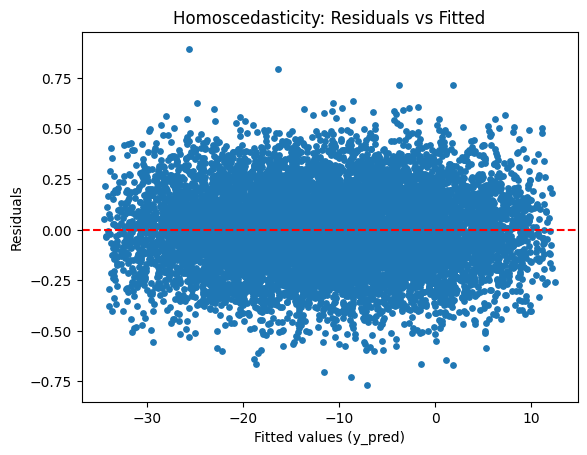

In [22]:
# Homoscedasticity: Residuals vs Fitted plot
plt.figure()
plt.scatter(y_pred, resid, s=15)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values (y_pred)")
plt.ylabel("Residuals")
plt.title("Homoscedasticity: Residuals vs Fitted")
plt.show()


### 4. No Perfect Multicollinearity
$$\mathrm{rank}(X)=p$$

This assumption requires that no predictor is an exact linear combination of the others, so that $(X^\top X)^{-1}$ exists and $\hat{\beta}$ is identifiable. Even when multicollinearity is not perfect, strong correlation between predictors can make coefficients unstable and inflate their variance. A practical diagnostic is to compute the **rank of $X$** (perfect multicollinearity occurs when $\mathrm{rank}(X)<p$).

In [23]:
# Perfect multicollinearity check via matrix rank
rank = np.linalg.matrix_rank(X_raw)
p = X_raw.shape[1]

log.info(f"rank(X_raw) = {rank}, p = {p}")

if rank < p:
    log.info("Perfect multicollinearity detected: X_raw is rank-deficient.")
else:
    log.info("No perfect multicollinearity detected: X_raw has full column rank.")

[2026-02-04 22:05:11,037] [INFO] rank(X_raw) = 2, p = 2
[2026-02-04 22:05:11,037] [INFO] No perfect multicollinearity detected: X_raw has full column rank.


### 5. Normality of Errors
$$\epsilon \sim \mathcal{N}(0, \sigma^2 I_n)$$

Normality is mainly needed for **exact** hypothesis tests and confidence intervals in the classical (Gaussian) linear regression model; it is not required for OLS to produce unbiased point estimates. A standard diagnostic is a **Q–Q plot** of residuals: if errors are approximately normal, the points should lie close to the diagonal reference line, with only mild deviations in the tails.

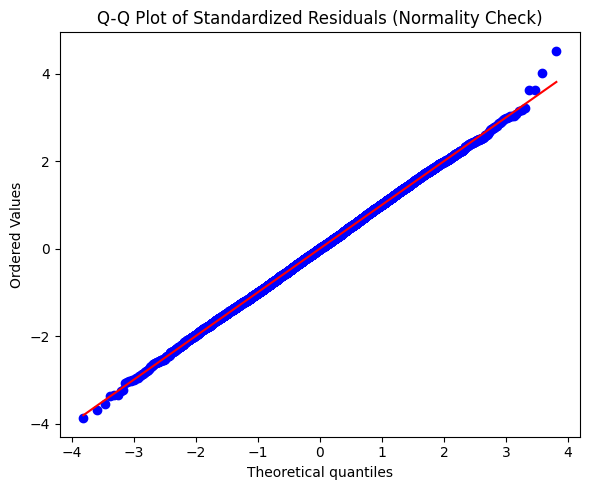

In [24]:
# Q-Q plot of standardized residuals

fig, ax = plt.subplots(figsize=(6, 5))
stats.probplot(std_resid, dist="norm", plot=ax)
ax.set_title("Q-Q Plot of Standardized Residuals (Normality Check)")
plt.tight_layout()
plt.show()

Possible addition:

 - hypothesis testing

 - adjusted R^2

 - feature selection

 - regularisation